# Probando python-binance

Instalado con `pip install python-binance` en consola de `anaconda3`.

At the current time Binance rate limits are:

- 1200 requests per minute
- 10 orders per second
- 100,000 orders per 24hrs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from binance.client import Client
%matplotlib notebook
import datetime
import time
import pandas as pd
import os
import btalib
from scipy import optimize
import pywt
# import ray

api_key = 'l7V3cDSWRkFlQknNUpgYEsagPVoO9eDZROyuef6WgShu69772dHAvgHOjE9JuNIR'
api_secret = 'NMcpJjkppPcuWhhFu2CmC9EC93tJiO6ipK1hJI60oW2QfNoPwc6QWQiph5uIX2aq'
client = Client(api_key, api_secret)

In [2]:
res = client.get_exchange_info()
print(res.keys())
print(len(res["symbols"]))
print(res["symbols"][0])
print(next(x for x in res["symbols"] if x['symbol'] == 'BNBBTC'))

dict_keys(['timezone', 'serverTime', 'rateLimits', 'exchangeFilters', 'symbols'])


In [63]:
# info = client.get_symbol_info('BNBBTC')

info = client.get_all_isolated_margin_symbols()
print([item['symbol'] for item in info])

['1INCHBTC', '1INCHUSDT', 'AAVEBTC', 'AAVEBUSD', 'AAVEUSDT', 'ADABTC', 'ADABUSD', 'ADAETH', 'ADAEUR', 'ADAUSDT', 'AERGOBTC', 'AERGOBUSD', 'AIONBTC', 'AIONUSDT', 'AKROBTC', 'AKROUSDT', 'ALGOBTC', 'ALGOBUSD', 'ALGOUSDT', 'ALICEBTC', 'ALICEBUSD', 'ALICEUSDT', 'ALPHABTC', 'ALPHABUSD', 'ALPHAUSDT', 'ANKRBTC', 'ANKRUSDT', 'ANTBTC', 'ANTBUSD', 'ANTUSDT', 'ARDRBTC', 'ARDRUSDT', 'ARPABTC', 'ARPAUSDT', 'ATOMBTC', 'ATOMBUSD', 'ATOMUSDT', 'AUDIOBTC', 'AUDIOUSDT', 'AUDUSDT', 'AVABTC', 'AVABUSD', 'AVAXBTC', 'AVAXBUSD', 'AVAXUSDT', 'AXSBTC', 'AXSBUSD', 'AXSUSDT', 'BAKEBUSD', 'BAKEUSDT', 'BALBTC', 'BALBUSD', 'BALUSDT', 'BANDBTC', 'BANDUSDT', 'BATBTC', 'BATBUSD', 'BATUSDT', 'BCHBTC', 'BCHBUSD', 'BCHEUR', 'BCHUSDT', 'BELBTC', 'BELBUSD', 'BELUSDT', 'BLZBTC', 'BLZBUSD', 'BLZUSDT', 'BNBBTC', 'BNBBUSD', 'BNBETH', 'BNBEUR', 'BNBGBP', 'BNBUSDT', 'BNTBTC', 'BNTBUSD', 'BNTUSDT', 'BQXBTC', 'BTCAUD', 'BTCBUSD', 'BTCEUR', 'BTCGBP', 'BTCSTBTC', 'BTCSTBUSD', 'BTCSTUSDT', 'BTCUSDT', 'BTGBTC', 'BTGBUSD', 'BTGUSDT', 'B

In [4]:
print(client.get_server_time())
print(client.get_system_status())

{'serverTime': 1621084243841}
{'status': 0, 'msg': 'normal'}


In [5]:
# Error
# info = client.get_account_snapshot(type='SPOT')
# print(info)

In [6]:
# Get Market Depth
depth = client.get_order_book(symbol='BNBBTC')
print(type(depth), len(depth), depth.keys())      
# Get Recent Trades
trades = client.get_recent_trades(symbol='BNBBTC')
print('*******************\n',type(trades), len(trades))
print(type(trades[0]),len(trades[0]),trades[0].keys())
# Get Historical Trades
trades = client.get_historical_trades(symbol='BNBBTC')
print('*******************\n',type(trades), len(trades))
print(type(trades[0]),len(trades[0]),trades[0].keys())
# Get Aggregate Trades
trades = client.get_aggregate_trades(symbol='BNBBTC')
print('*******************\n',type(trades), len(trades))
print(type(trades[0]),len(trades[0]),trades[0].keys())

<class 'dict'> 3 dict_keys(['lastUpdateId', 'bids', 'asks'])
*******************
 <class 'list'> 500
<class 'dict'> 7 dict_keys(['id', 'price', 'qty', 'quoteQty', 'time', 'isBuyerMaker', 'isBestMatch'])
*******************
 <class 'list'> 500
<class 'dict'> 7 dict_keys(['id', 'price', 'qty', 'quoteQty', 'time', 'isBuyerMaker', 'isBestMatch'])
*******************
 <class 'list'> 500
<class 'dict'> 8 dict_keys(['a', 'p', 'q', 'f', 'l', 'T', 'm', 'M'])


Length of list  10566


<IPython.core.display.Javascript object>


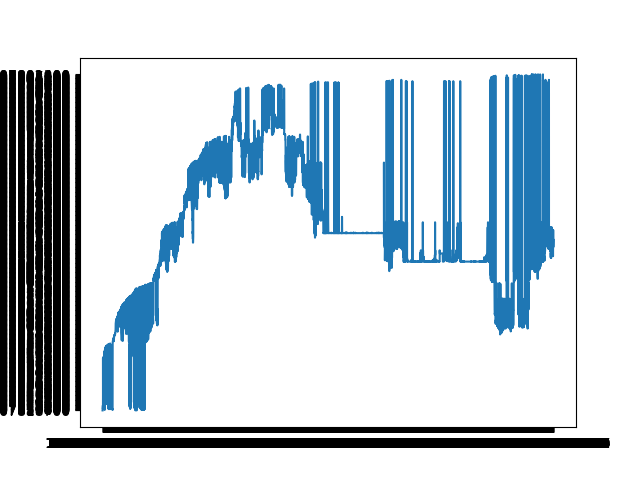

In [8]:
# Aggregate trade iterator. Too much detail
agg_trades = client.aggregate_trade_iter(symbol='ETHBTC', start_str='30 minutes ago UTC')
times_prices = np.asarray([(x['T'],x['p']) for x in agg_trades])

print("Length of list ",len(times_prices))
# Aggregate trade:
"""     "a": 26129,         # Aggregate tradeId
        "p": "0.01633102",  # Price
        "q": "4.70443515",  # Quantity
        "f": 27781,         # First tradeId
        "l": 27781,         # Last tradeId
        "T": 1498793709153, # Timestamp
        "m": true,          # Was the buyer the maker?
        "M": true           # Was the trade the best price match? """

# fig, ax = plt.subplots()
# ax.plot(times_prices[:,0], times_prices[:,1])
# plt.show()

In [18]:
# Get Kline/Candlesticks
# candles = client.get_klines(symbol='BNBBTC', interval=Client.KLINE_INTERVAL_30MINUTE)
# candles[0]
# All strings except Open time, Close time, Number of trades (int)
# Open time, Open, High, Low, Close, Volume, Close time, ...
# Quote asset volume, Number of trades, Taker buy base asset volume, ...
# Taker buy quote asset volume, Ignore
# Get historical candle data
symbol = 'ETH'
rate = symbol + 'USDT'
save_csv = True
start_date = str(datetime.date(2021,1,1))
period = '15m'

candles = client.get_historical_klines(rate,period,start_date)
# Delete unwanted data
for line in candles:
    del line[6:]
# Create a Pandas DataFrame and export to CSV
crypto_df = pd.DataFrame(candles, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
crypto_df.set_index('date', inplace=True)
print(crypto_df.head())
if save_csv:
    crypto_df.to_csv('C:\\Users\\j05625pe\\Documents\\Personal\\Binance\\' + symbol + '_' + start_date + '_' + period + '.csv')

                       open          high           low         close  \
date                                                                    
1609459200000  736.42000000  739.00000000  730.03000000  731.14000000   
1609460100000  731.14000000  732.28000000  729.33000000  731.60000000   
1609461000000  731.55000000  734.29000000  731.45000000  733.54000000   
1609461900000  733.54000000  735.59000000  732.38000000  734.07000000   
1609462800000  734.08000000  743.47000000  733.37000000  743.41000000   

                       volume  
date                           
1609459200000  10679.63623000  
1609460100000   6954.72694000  
1609461000000   4958.21322000  
1609461900000   5340.12245000  
1609462800000  14643.20784000  


In [43]:
# Get account info. I had to adjust the clock using nistime-32bit.exe
info = client.get_account()
for balance in info["balances"]:
    if float(balance["free"]) > 0 or float(balance["locked"]) > 0:
        print(balance)
# Get asset balance
# balance = client.get_asset_balance(asset='BTC')
# Get account status
# status = client.get_account_status() # {'data': 'Normal'}
# Get account API trading status : updateTime
# status = client.get_account_api_trading_status()

# Get trades : current?
# trades = client.get_my_trades(symbol='ETHUSDT')
# Get trade fees
# get fees for all symbols
# fees = client.get_trade_fee()
# get fee for one symbol
# fees = client.get_trade_fee(symbol='ETHUSDT')
# Get asset details
# details = client.get_asset_details()
# Get dust log
# log = client.get_dust_log()
# Transfer dust
# transfer = client.transfer_dust(asset='BNZ')
# Get Asset Dividend History
# history = client.get_asset_dividend_history()
# Disable Fast Withdraw Switch
# client.disable_fast_withdraw_switch()
# Enable Fast Withdraw Switch
# client.enable_fast_withdraw_switch()

{'asset': 'LTC', 'free': '0.00000001', 'locked': '0.00000000'}
{'asset': 'USDT', 'free': '2726.90919228', 'locked': '0.00000000'}
{'asset': 'XTZ', 'free': '0.00000001', 'locked': '0.00000000'}
{'asset': 'GBP', 'free': '1032.40000000', 'locked': '0.00000000'}
{'total': 0, 'rows': []}


In [8]:
def wallet_value(df, wallet):
    if not isinstance(df.close, float):
        last_value_bit = df.close.iat[-1]    
    else:
        last_value_bit = df.close
    return wallet["usdt"] + wallet["btc"] * last_value_bit

def bot_pablo_01(df, wallet_usdt_ini=1000, coins=50, min_value_coin=2, rsi_dif_overboughtsold=24, wait_for_same_action=5,
                 portion_to_sell=1, fee=0.0075, rsi_period=14, ema_rsi_period=500):
    """ RSI based bot. The difference between the RSI index and an EMA of this RSI is used to decide for buying or selling.
    """
    wallet = {"usdt":wallet_usdt_ini, "btc":0.0}                
    last_buy, last_sell = wait_for_same_action, wait_for_same_action
    times_buy, times_sell = 0, 0
    
    # RSI is above 50 when overbought, around 70 is time to sell, 30 to buy. When trending, these values change.    
    df['rsi'] = btalib.rsi(df, period=round(rsi_period)).df
    ema_rsi = btalib.ema(df.rsi, period=round(ema_rsi_period)).df
    df['rsi_dif'] = df.rsi - ema_rsi.ema
    
    wealth_history = pd.DataFrame(index=df.index, columns=["w"], dtype=float)
        
    for index, moment in df.iterrows():
        if np.isfinite(moment.rsi_dif):
            value_coin = max(wallet["usdt"]/coins, min_value_coin)
            if moment.rsi_dif > rsi_dif_overboughtsold and last_sell >= wait_for_same_action:
                # Sell
                if wallet["btc"] > 0 and portion_to_sell > 0:
                    selling = wallet["btc"] * portion_to_sell
                    wallet["btc"] -= selling
                    wallet["usdt"] += selling * moment.close * (1.0-fee)
                    last_sell = 0
                    last_buy += 1
                    times_sell += 1                    
            elif moment.rsi_dif < -rsi_dif_overboughtsold and last_buy >= wait_for_same_action:
                # Buy
                if wallet["usdt"] > value_coin:
                    wallet["usdt"] -= value_coin
                    wallet["btc"] += value_coin*(1.0-fee) / moment.close
                    last_buy = 0
                    last_sell += 1   
                    times_buy += 1
            else:
                last_buy += 1
                last_sell += 1          
        wealth_history.w.at[index] = wallet_value(moment, wallet)
                
    return wallet, [times_buy, times_sell], wealth_history

def bot_pablo_01_bounds():
    # coins, rsi_dif_overboughtsold, wait_for_same_action, portion_to_sell, rsi_period=14, ema_rsi_period=500
    return [(1, 500), (0.0, 50.0), (0, 50), (0.0, 1.0), (5, 50), (5, 5000)]

def opt_wrap_bot01(x, *args): # Optimization wrapper
    # Cost function that focuses in end return
    df = args[0]    
    coins, rsi_dif_overboughtsold, wait_for_same_action, portion_to_sell, rsi_period, ema_rsi_period = x
    wallet, times, wealth_history = bot_pablo_01(df, coins=coins, rsi_dif_overboughtsold=rsi_dif_overboughtsold, 
                                 wait_for_same_action=wait_for_same_action, portion_to_sell=portion_to_sell,
                                 rsi_period=rsi_period, ema_rsi_period=ema_rsi_period)
    for kt, t in enumerate(times):
        args[1][kt].append(t)
    args[2][0] = wealth_history
    return -wallet_value(df, wallet)

def opt_wrap_bot01_mean_percent_daily(x, *args):  # Optimization wrapper
    # Cost function that maximizes the mean percentage winning of each day
    df = args[0]    
    coins, rsi_dif_overboughtsold, wait_for_same_action, portion_to_sell, rsi_period, ema_rsi_period = x
    wallet, times, wealth_history = bot_pablo_01(df, coins=coins, rsi_dif_overboughtsold=rsi_dif_overboughtsold, 
                                 wait_for_same_action=wait_for_same_action, portion_to_sell=portion_to_sell,
                                 rsi_period=rsi_period, ema_rsi_period=ema_rsi_period)
    for kt, t in enumerate(times):
        args[1][kt].append(t)
    args[2][0] = wealth_history  # Trying to keep last wealth history
    # Keep winnings of each day
    each_day = wealth_history.at_time('12:00')
    ratio_increments = 1.0 - each_day.iloc[1:] / each_day.iloc[:-1]
    # print("each_day : type : ", type(each_day), ", shape : ", each_day.shape)
    # print("ratio_increments : type : ", type(ratio_increments), ", shape : ", ratio_increments.shape)    
    """
    printing = ratio_increments.iloc[5:10].values    
    printing = each_day.iloc[5:10].values    
    print("Some ratio increments:")
    for num in printing:
        print(f"{num[0]:.16f}")
    """
    return -ratio_increments.mean(numeric_only=True).values[0]

# Consider case of cost function that regularizes by using standard deviation of winnings of each day

# Function that obtains the best possible policy (hold, buy, sell)
def best_policy_decisions(df, fee):
    decisions = pd.DataFrame(0, index=df.index, columns="d")    
    # Find local peaks and merge
    mins = df.close[(df.close.shift(1) > df.close) & (df.close < df.close.shift(-1))]
    maxs = df.close[(df.close.shift(1) < df.close) & (df.close > df.close.shift(-1)) & (df.index > mins.index.iat[0])] # dismiss maximum that comes before first minimum        
    
    # Classify minimums as buying points    
    for idx in range(1, mins.shape[0]):    
        # A minimum is considered
        # There must be a next maximum with value greater than $min / (1-fee)**2$ with no minimums
        # in the midlle lower than this minimum
        threshold = mins.
            # Set of next 
            if moment.iloc[1]["close"] < prev_ext_moment*(1-2*fee):
                # It is worth to buy
                prev_ext_moment = moment.iloc[1]["close"]
                decisions.iloc[idx]["d"] = 1
        elif moments.iloc[2]["close"] < moments.iloc[1]["close"] > moments.iloc[0]["close"]:: # wait for max
            # A maximum is found. Only sell if next minimum is less than 
            if moment.iloc[1]["close"] > prev_ext_moment*(1-2*fee):
    

## Bot 1, info from BNB 1 January 2021 - 22/05/2021

Times:
{'shgo': 189.5127272605896, 'dual_annealing': 53676.81734585762, 'differential_evolution': 11538.86363697052. 'basinhopping': 4841.052201271057}

Results:
- {'shgo':      fun: -7853.695339646952
    funl: array([-7853.69533965])
 message: 'Optimization terminated successfully.'
    nfev: 72
     nit: 2
   nlfev: 7
   nlhev: 0
   nljev: 1
 success: True
       x: array([500.,   0.,   0.,   0.,  50.,   5.])
      xl: array([[500.,   0.,   0.,   0.,  50.,   5.]]),
- 'dual_annealing':      fun: -9057.214660759622
 message: ['Maximum number of iteration reached']
    nfev: 17230
    nhev: 0
     nit: 1000
    njev: 747
  status: 0
 success: True
       x: array([1.00200755e+00, 1.33192938e+01, 2.75265453e-01, 0.00000000e+00,
       2.24188538e+01, 1.02689477e+03]),
- 'differential_evolution':      fun: -9051.589195470076
 message: 'Optimization terminated successfully.'
    nfev: 7504
     nit: 76
 success: True
       x: array([1.00320430e+00, 2.74449034e+01, 4.44380990e+01, 2.02083364e-05,
       9.63708761e+00, 1.02680862e+03])}
- 'basinhopping':                         fun: -1000.1045917423617
                x: array([ 6.37944079e+02,  2.84790910e+01,  2.46788947e+01, -1.00060272e+00,
        2.81451640e+01,  2.50386901e+03])
        
Using global optimization in daily winnings (shgo and differential evolution):
{'shgo':      fun: -0.0
 message: 'Failed to find a feasible minimizer point. Lowest sampling point = -0.0'
    nfev: 65
     nit: 2
   nlfev: 0
   nlhev: 0
   nljev: 0
 success: False
       x: array([1., 0., 0., 0., 5., 5.]), 'differential_evolution':      fun: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 187
     nit: 1
 success: True
       x: array([3.72355538e+01, 3.45872842e+01, 2.53486738e+01, 7.55941912e-01,
       4.02925692e+01, 2.13983316e+03])}
{'shgo': 115.73537254333496, 'differential_evolution': 309.89390206336975}


Using minimize:

- 'L-BFGS-B':       fun: -0.0
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0., 0., 0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 7
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03]), 
- 'TNC':      fun: -0.0
     jac: array([0., 0., 0., 0., 0., 0.])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 0
  status: 0
 success: True
       x: array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03]), 
- 'Powell':    direc: array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])
     fun: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 177
     nit: 1
  status: 0
 success: True
       x: array([4.99999937e+02, 4.99999633e+01, 4.99999633e+01, 9.99933893e-01,
       4.99999367e+01, 4.99999992e+03]), 
- 'trust-constr':  barrier_parameter: 0.1
 barrier_tolerance: 0.1
          cg_niter: 0
      cg_stop_cond: 0
            constr: [array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.01595759391784668
               fun: -0.0
              grad: array([0., 0., 0., 0., 0., 0.])
               jac: [<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([0., 0., 0., 0., 0., 0.])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 7
              nhev: 0
               nit: 1
             niter: 1
              njev: 1
        optimality: 0.0
            status: 1
           success: True
         tr_radius: 1.0
                 v: [array([0., 0., 0., 0., 0., 0.])]
                 x: array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03]), 
- 'SLSQP':      fun: -0.0
     jac: array([0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03]), 'COBYLA':      fun: -0.0
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 37
  status: 1
 success: True
       x: array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01,
       2.5025e+03])}
- Times : {'L-BFGS-B': 9.477985858917236, 'TNC': 10.513530254364014, 'Powell': 272.8368835449219, 'trust-constr': 13.06014370918274, 'SLSQP': 14.184144020080566, 'COBYLA': 60.546295404434204}

In [9]:
path_with_csvs = 'C:\\Users\\j05625pe\\Documents\\Personal\\Binance'
do_plot = False

files = os.listdir(path_with_csvs)
dfs = []
rsis = []
for file in [files[0]]:
    print('Working with ', file)
    # dfs.append(pd.read_csv(os.path.join(path_with_csvs, file), index_col=0))
    # rsis.append(btalib.rsi(dfs[-1], period=14))
    df = pd.read_csv(os.path.join(path_with_csvs, file), index_col='date') # , parse_dates=True) 
    df.index = pd.to_datetime(df.index, unit='ms') # Very important!!!!
    # df.set_index('date',inplace=True) 
    print(df.columns)    
    # df['SMA'] = btalib.sma(df.close).df
    # print(df)    
    # ema = btalib.ema(df)
    # first_close_price = df.close.iloc[0]
    # ema = btalib.ema(df.close, _seed=first_close_price)
    
    if do_plot:
        n_rsi = 14
        n_ema = 500

        # RSI is above 50 when overbought, around 70 is time to sell, 30 to buy. When trending, these values change.
        df['rsi'] = btalib.rsi(df, period=n_rsi).df
        ema_rsi = btalib.ema(df.rsi, period=30*n_rsi).df
        difference = df.rsi - ema_rsi.ema
                
        n_tail = 500 # df.shape[0]        
        print(difference.shape)

        fig, axs = plt.subplots(3,1)
        axs[0].plot(df.close.tail(n_tail))
        axs[0].plot(df.high.tail(n_tail), ':')
        axs[0].plot(df.low.tail(n_tail), ':')
        axs[1].plot(df.rsi.tail(n_tail))
        axs[1].plot(ema_rsi.tail(n_tail))
        axs[2].plot(difference.tail(n_tail))
    
    # Trying bots
    # df["rsi_dif"] = difference
    # wallet_out, times = bot_pablo_01(df)
    # print(wallet_value(df, wallet_out))
    # print("Buys :", times[0], "Sells :", times[1])        
    
    # Optimization
    results = dict()
    times = [[], []]
    wealth_history = [0]
    args = (df, times, wealth_history)
    elapsed_times = dict()
    optimize_wrapper = opt_wrap_bot01_mean_percent_daily
    bounds_for_global = np.asarray(bot_pablo_01_bounds())   # list of 2-item tuples
    bounds_obj = optimize.Bounds(bounds_for_global[:, 0], bounds_for_global[:, 1])
    x0 = np.mean(bot_pablo_01_bounds(), axis=1)
        
    # minimize: bounded optimization :  trying L-BFGS-B, TNC, SLSQP, Powell, trust-constr, COBYLA
    """
    t0 = time.time()    
    results["L-BFGS-B"] = optimize.minimize(optimize_wrapper, x0, args=args, method='L-BFGS-B', bounds=bounds_obj)
    elapsed_times["L-BFGS-B"] = time.time() - t0
    t0 = time.time()    
    results["TNC"] = optimize.minimize(optimize_wrapper, x0, args=args, method='TNC', bounds=bounds_obj)
    elapsed_times["TNC"] = time.time() - t0
    t0 = time.time()    
    results["Powell"] = optimize.minimize(optimize_wrapper, x0, args=args, method='Powell', bounds=bounds_obj)
    elapsed_times["Powell"] = time.time() - t0
    t0 = time.time()    
    results["trust-constr"] = optimize.minimize(optimize_wrapper, x0, args=args, method='trust-constr', bounds=bounds_obj)
    elapsed_times["trust-constr"] = time.time() - t0
    t0 = time.time()    
    results["SLSQP"] = optimize.minimize(optimize_wrapper, x0, args=args, method='SLSQP', bounds=bounds_obj)
    elapsed_times["SLSQP"] = time.time() - t0
    t0 = time.time()    
    results["COBYLA"] = optimize.minimize(optimize_wrapper, x0, args=args, method='COBYLA', bounds=bounds_obj)
    elapsed_times["COBYLA"] = time.time() - t0
    """    
    # Global optimization
    """ Preferred
    t0 = time.time()
    results["shgo"] = optimize.shgo(optimize_wrapper, bot_pablo_01_bounds(), args)
    elapsed_times["shgo"] = time.time() - t0
    t0 = time.time()
    results["differential_evolution"] = optimize.differential_evolution(optimize_wrapper, bot_pablo_01_bounds(), args)
    elapsed_times["differential_evolution"] = time.time() - t0    
    """
    """ Messy
    t0 = time.time()
    results["dual_annealing"] = optimize.dual_annealing(opt_wrap_bot01, bot_pablo_01_bounds(), args)
    elapsed_times["dual_annealing"] = time.time() - t0
    t0 = time.time()
    x0 = np.mean(bot_pablo_01_bounds(), axis=1)
    minimizer_kwargs = {"method" : "trust-constr", "args" : args}
    results["basinhopping"] = optimize.basinhopping(opt_wrap_bot01, x0, minimizer_kwargs=minimizer_kwargs)
    elapsed_times["basinhopping"] = time.time() - t0
    """    
    print(results)
    # print(times) # How many times of buy and sell actions
    print(elapsed_times)    
    
    """
    # Testing optimization wrapper
    # print(df)
    x_test = np.array([500.,   0.,   0.,   0.,  50.,   5.])
    results = opt_wrap_bot01_mean_percent_daily(x_test, *args)
    """

Working with  BNB_2021-01-01_15m.csv
Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
{}
{}


In [10]:
args_test = [df, [[], []], [0]]
x = np.array([2.5050e+02, 2.5000e+01, 2.5000e+01, 5.0000e-01, 2.7500e+01, 2.5025e+03])
# mean_end_of_day = opt_wrap_bot01_mean_percent_daily(x, *args_test)
value_end = opt_wrap_bot01(x, *args_test)
print("End value: ", f"{-value_end:.16f}")
print(args_test[1])

End value:  998.2942310842183815
[[4], [4]]


In [17]:
# for key, r in results.items():
#    print(f"{r['fun']:0.16f}")

# next(df.iterrows())

# print([a for a in range(1, 4)])

# print(type(df.iloc[0]["close"]))
a = df.copy()
a["min"] = df.close[(df.close.shift(1) > df.close) & (df.close < df.close.shift(-1))]
print(a.min)

<bound method NDFrame._add_numeric_operations.<locals>.min of                          open      high       low     close       volume  \
date                                                                       
2021-01-01 00:00:00   37.3596   37.4221   36.9706   37.0022   35292.6560   
2021-01-01 00:15:00   37.0134   37.1332   36.9636   37.0610   16981.3010   
2021-01-01 00:30:00   37.0653   37.1750   37.0000   37.1373   13265.6390   
2021-01-01 00:45:00   37.1433   37.4423   37.0942   37.3764   29574.2300   
2021-01-01 01:00:00   37.3765   37.5971   37.3353   37.5807   36983.5000   
...                       ...       ...       ...       ...          ...   
2021-05-22 10:45:00  320.2000  330.0000  318.2900  323.0000  132621.9822   
2021-05-22 11:00:00  323.0000  326.9300  321.8200  322.6000   60875.0490   
2021-05-22 11:15:00  322.6100  324.2300  319.3900  320.6700   35229.5003   
2021-05-22 11:30:00  320.6700  323.4600  316.3600  320.2000   51127.2729   
2021-05-22 11:45:00  320.1

In [12]:
import pywt
import numpy as np

x = (np.random.randn(16)*5).astype(int)
wavelet_type = 'db1'
wavelet_levels = 1

print(x)
cf_swt = pywt.swt(x, wavelet=wavelet_type, level=wavelet_levels, trim_approx=True, norm=True)
# print([y*2 for y in cf_swt])
print(cf_swt)
wavelet_levels = 2
cf_swt = pywt.swt(x, wavelet=wavelet_type, level=wavelet_levels, trim_approx=True, norm=True)
# print([y*2 for y in cf_swt])
print(cf_swt)

[ 6 -1 -3 -5 -3  0 -6 -1 -4  0 -5 10  0  4  4 10]
[array([ 2.5, -2. , -4. , -4. , -1.5, -3. , -3.5, -2.5, -2. , -2.5,  2.5,
        5. ,  2. ,  4. ,  7. ,  8. ]), array([ 3.5,  1. ,  1. , -1. , -1.5,  3. , -2.5,  1.5, -2. ,  2.5, -7.5,
        5. , -2. ,  0. , -3. ,  2. ])]
[array([-0.75, -3.  , -2.75, -3.5 , -2.5 , -2.75, -2.75, -2.5 ,  0.25,
        1.25,  2.25,  4.5 ,  4.5 ,  6.  ,  4.75,  3.  ]), array([ 3.25,  1.  , -1.25, -0.5 ,  1.  , -0.25, -0.75,  0.  , -2.25,
       -3.75,  0.25,  0.5 , -2.5 , -2.  ,  2.25,  5.  ]), array([ 3.5,  1. ,  1. , -1. , -1.5,  3. , -2.5,  1.5, -2. ,  2.5, -7.5,
        5. , -2. ,  0. , -3. ,  2. ])]


Para un instante $n$, los coeficientes correspondientes son $n-1$ para $d_1$, $n-2$ para $d_2$, ... $n-L$ para $d_L$ y $n-L$ para $a_L$, con $L$ la cantidad de niveles de decomposición.